### Bước 1: Đọc dữ liệu

In [25]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from itertools import combinations
import numpy as np

In [ ]:

# Tải dữ liệu cần thiết
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [23]:
# Đọc file CSV
file_path = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\k-means\data\bbc-text.csv'
df = pd.read_csv(file_path)

### Bước 2: Tiền xử lý văn bản

In [ ]:
# Khởi tạo stopwords và lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Hàm tiền xử lý văn bản
def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

# Áp dụng hàm tiền xử lý lên cột 'text'
df['clean_text'] = df['text'].apply(preprocess_text)


df_clean = df.copy()['clean_text']

df_clean.to_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\k-means\data\cleaned_text.csv', index=False)

        category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                          clean_text  
0  tv future hand viewer home theatre system plas...  
1  worldcom bos left book alone former worldcom b...  
2  tiger wary farrell gamble leicester say rushed...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raid box office ocean twelve crim...  


### Bước 3: Vector hóa văn bản bằng TF-IDF

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_clean)

### Bước 4: Giảm chiều dữ liệu bằng PCA

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

### Bước 5: Chọn số cụm K tối ưu

k = 2, Average ARI = 0.2245
k = 3, Average ARI = 0.3798
k = 4, Average ARI = 0.4058
k = 5, Average ARI = 0.4935
k = 6, Average ARI = 0.4955
k = 7, Average ARI = 0.5413
k = 8, Average ARI = 0.4488
k = 9, Average ARI = 0.4475
k = 10, Average ARI = 0.4211


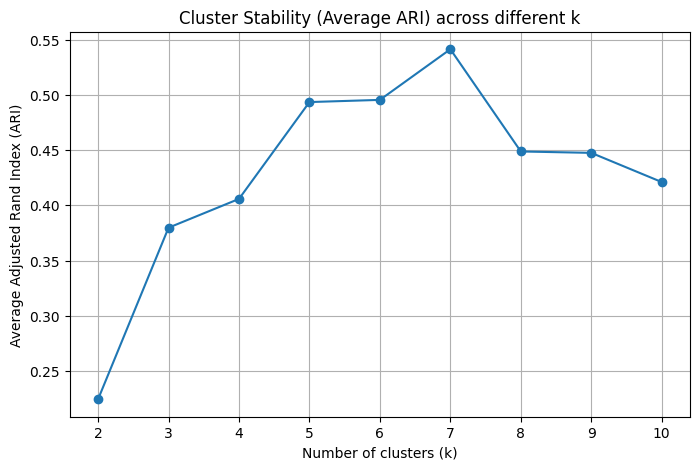

In [ ]:
# # Hàm tính độ ổn định cluster cho một k với n_init lần chạy
# def cluster_stability_single_k(X, k, n_init=10, random_state_base=42):
#     cluster_labels = []
#     for i in range(n_init):
#         kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=random_state_base + i)
#         kmeans.fit(X)
#         cluster_labels.append(kmeans.labels_)

#     # Tính ARI giữa các cặp phân cụm
#     scores = []
#     for (labels1, labels2) in combinations(cluster_labels, 2):
#         score = adjusted_rand_score(labels1, labels2)
#         scores.append(score)

#     avg_ari = np.mean(scores)
#     return avg_ari, cluster_labels

# # # Ví dụ: phân cụm với k=5 và 10 lần chạy
# # k = 5
# # n_init = 10

# # # Giả sử X là ma trận TF-IDF của bạn, df là DataFrame ban đầu
# # avg_ari, labels_list = cluster_stability_single_k(X, k, n_init=n_init, random_state_base=42)

# # print(f"Average Adjusted Rand Index for k={k}: {avg_ari:.4f}")

# # Vẽ biểu đồ độ ổn định
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, ari_scores, marker='o')
# plt.title('Cluster Stability (Average ARI) across different k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Average Adjusted Rand Index (ARI)')
# plt.grid(True)
# plt.show()


# Hàm tính độ ổn định cluster cho một k với n_init lần chạy
def cluster_stability_single_k(X, k, n_init=10, random_state_base=42):
    cluster_labels = []
    for i in range(n_init):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=random_state_base + i)
        kmeans.fit(X)
        cluster_labels.append(kmeans.labels_)

    # Tính ARI giữa các cặp phân cụm
    scores = []
    for (labels1, labels2) in combinations(cluster_labels, 2):
        score = adjusted_rand_score(labels1, labels2)
        scores.append(score)

    avg_ari = np.mean(scores)
    return avg_ari, cluster_labels

# Chạy phân tích ổn định cho nhiều k
k_values = range(2, 11)  # thử từ 2 đến 10 cụm
n_init = 10
ari_scores = []

for k in k_values:
    avg_ari, _ = cluster_stability_single_k(X, k, n_init=n_init, random_state_base=42)
    ari_scores.append(avg_ari)
    print(f"k = {k}, Average ARI = {avg_ari:.4f}")

# Vẽ biểu đồ độ ổn định
plt.figure(figsize=(8, 5))
plt.plot(k_values, ari_scores, marker='o')
plt.title('Cluster Stability (Average ARI) across different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()


### Bước 6: Áp dụng K-Means++ 



In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

df_clustered = df[['category', 'clean_text']].copy()
df_clustered['Cluster'] = labels

# 9. Lưu vào file CSV
df_clustered.to_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\k-means\data\clustered_text.csv',index=False)


Chọn lần chạy ổn định nhất: 8, ARI trung bình: 0.5569
Đã lưu kết quả phân cụm ổn định nhất (k=6) vào: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\k-means\data\clustered_text_k6_stable.csv


### Bước 7: Vẽ biểu đồ phân cụm

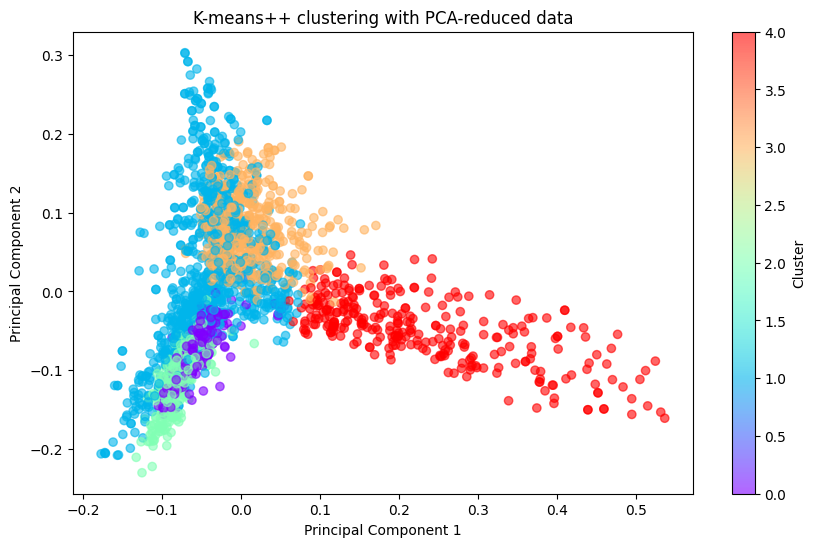

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', alpha=0.6)
plt.title("K-means++ clustering with PCA-reduced data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()